<a href="https://colab.research.google.com/github/JaperTai77/Tensorflow_DL/blob/main/tf2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision with TF2

## CNN Model (Binary)

### Simple model

#### Import data

In [3]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-11-01 05:21:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.157.128, 142.251.8.128, 74.125.23.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.157.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   122MB/s    in 0.9s    

2021-11-01 05:21:50 (122 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



(384, 512, 3)


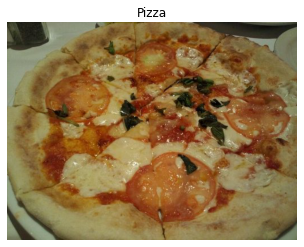

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('pizza_steak/train/pizza/1008104.jpg')
plt.imshow(img)
plt.title('Pizza')
plt.axis("off")

print(img.shape) # return (width,height,colorchannel)

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# scale data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train = train_datagen.flow_from_directory(
                      '/content/pizza_steak/train',batch_size = 32, #process 32 at a time
                      target_size = (224,224), #convert image to 224
                      class_mode = 'binary' #binary problem
                      )

valid = valid_datagen.flow_from_directory(
                      '/content/pizza_steak/test',batch_size = 32, #process 32 at a time
                      target_size = (224,224), #convert image to 224
                      class_mode = 'binary' #binary problem
                      )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [4]:
image, labels = train.next()
len(image) # same as the batch size

32

In [7]:
print(1500/32)
len(train) # 47 batches

46.875


47

In [11]:
image[0].shape

(224, 224, 3)

#### Build Model

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 10,kernel_size = 3,
                                 activation = 'relu',
                                 input_shape = (224,224,3)))
model.add(tf.keras.layers.Conv2D(filters = 10, kernel_size = 3,
                                 activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, padding = 'valid'))
model.add(tf.keras.layers.Conv2D(filters = 10, kernel_size = 3,
                                 activation = 'relu'))
model.add(tf.keras.layers.Conv2D(filters = 10, kernel_size = 3,
                                 activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))

In [ ]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

model.fit(train,epochs = 2,steps_per_epoch=len(train),
          validation_data=valid,
          validation_steps=len(valid))

Epoch 1/2
47/47 [==============================] - 91s 2s/step - loss: 0.5576 - accuracy: 0.7027 - val_loss: 0.4264 - val_accuracy: 0.8120
Epoch 2/2
47/47 [==============================] - 89s 2s/step - loss: 0.4616 - accuracy: 0.7887 - val_loss: 0.4050 - val_accuracy: 0.8180


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)            

#### Baseline CNN

In [3]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=10, # 10 filters per input tensor
                    kernel_size=3, # shape of filter
                    strides=1, # 1 pixal at a time
                    padding='valid', # same/valid
                    activation='relu', 
                    input_shape=(224, 224, 3)))
model.add(tf.keras.layers.Conv2D(10, 3,strides=1, activation='relu'))
model.add(tf.keras.layers.Conv2D(10, 3,strides=1, activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))

In [4]:
model.compile(loss = tf.keras.losses.binary_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten (Flatten)            (None, 475240)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [21]:
len(train)

47

In [6]:
history = model.fit(train,
                    epochs = 10,
                    steps_per_epoch = len(train), # each epoch run through all batch
                    validation_data = valid,
                    validation_steps = len(valid))

Epoch 1/10
47/47 [==============================] - 43s 259ms/step - loss: 0.6478 - accuracy: 0.6633 - val_loss: 0.4068 - val_accuracy: 0.8400
Epoch 2/10
47/47 [==============================] - 11s 234ms/step - loss: 0.4660 - accuracy: 0.7880 - val_loss: 0.3759 - val_accuracy: 0.8260
Epoch 3/10
47/47 [==============================] - 11s 235ms/step - loss: 0.3347 - accuracy: 0.8613 - val_loss: 0.3751 - val_accuracy: 0.8340
Epoch 4/10
47/47 [==============================] - 11s 229ms/step - loss: 0.1815 - accuracy: 0.9347 - val_loss: 0.4674 - val_accuracy: 0.8000
Epoch 5/10
47/47 [==============================] - 11s 232ms/step - loss: 0.0535 - accuracy: 0.9867 - val_loss: 0.6569 - val_accuracy: 0.7840
Epoch 6/10
47/47 [==============================] - 11s 243ms/step - loss: 0.0233 - accuracy: 0.9953 - val_loss: 0.5458 - val_accuracy: 0.8180
Epoch 7/10
47/47 [==============================] - 11s 239ms/step - loss: 0.0114 - accuracy: 0.9987 - val_loss: 0.5962 - val_accuracy: 0.8280

#### Evaluation

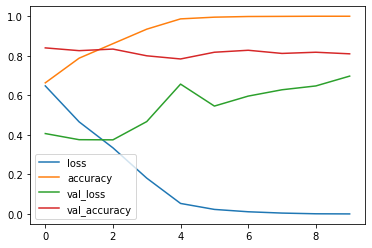

In [8]:
import pandas as pd
pd.DataFrame(history.history).plot()

### Reduce Overfitting CNN

#### 1. Maxpool

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(10,3,activation = 'relu', input_shape = (224, 224, 3)))
model.add(tf.keras.layers.MaxPool2D(pool_size=2)) # reduce number of features by half
model.add(tf.keras.layers.Conv2D(10,3,activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(10,3,activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))

model.compile(loss = tf.keras.losses.binary_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])
history = model.fit(train,
                    epochs = 5,
                    steps_per_epoch = len(train),
                    validation_data = valid,
                    validation_steps = len(valid))

Epoch 1/5
47/47 [==============================] - 11s 228ms/step - loss: 0.6361 - accuracy: 0.6567 - val_loss: 0.4759 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 10s 221ms/step - loss: 0.4670 - accuracy: 0.7927 - val_loss: 0.4438 - val_accuracy: 0.7920
Epoch 3/5
47/47 [==============================] - 10s 223ms/step - loss: 0.4491 - accuracy: 0.8007 - val_loss: 0.5089 - val_accuracy: 0.7340
Epoch 4/5
47/47 [==============================] - 10s 221ms/step - loss: 0.4457 - accuracy: 0.8007 - val_loss: 0.3717 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 10s 220ms/step - loss: 0.3892 - accuracy: 0.8387 - val_loss: 0.3225 - val_accuracy: 0.8780


In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6760)             

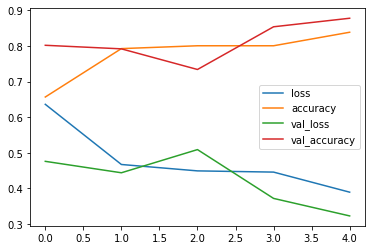

In [11]:
pd.DataFrame(history.history).plot()

#### 2. Data Augmentation

More diversity and allowing our models to learn more generalizable patterns. Adjusting the rotation of an image and flipping.

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   width_shift_range = 0.2, # move around x axis
                                   height_shift_range = 0.3, # move around y axis
                                   horizontal_flip = True
                                   )
valid_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train = train_datagen.flow_from_directory(
                      '/content/pizza_steak/train',batch_size = 32,
                      target_size = (224,224), 
                      class_mode = 'binary',
                      )

valid = valid_datagen.flow_from_directory(
                      '/content/pizza_steak/test',batch_size = 32,
                      target_size = (224,224),
                      class_mode = 'binary'
                      )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


(-0.5, 223.5, 223.5, -0.5)

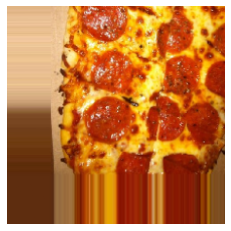

In [6]:
import random
import matplotlib.pyplot as plt
image, label = train.next()
plt.imshow(image[0])
plt.axis(False)

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(10,3,activation = 'relu', input_shape = (224,224,3)))
model.add(tf.keras.layers.MaxPool2D(2))
model.add(tf.keras.layers.Conv2D(10,3,activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(2))
model.add(tf.keras.layers.Conv2D(10,3,activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

model.fit(train,epochs = 5,steps_per_epoch = len(train),
          validation_data = valid,validation_steps = len(valid))

Epoch 1/5
47/47 [==============================] - 55s 524ms/step - loss: 0.6713 - accuracy: 0.5673 - val_loss: 0.5973 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 24s 514ms/step - loss: 0.5543 - accuracy: 0.7333 - val_loss: 0.3848 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 24s 520ms/step - loss: 0.5403 - accuracy: 0.7187 - val_loss: 0.3975 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 25s 524ms/step - loss: 0.5125 - accuracy: 0.7467 - val_loss: 0.4098 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 25s 523ms/step - loss: 0.5010 - accuracy: 0.7680 - val_loss: 0.3514 - val_accuracy: 0.8560


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6760)             

### Make Prediction (own image)

--2021-11-01 08:04:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2021-11-01 08:04:58 (30.5 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

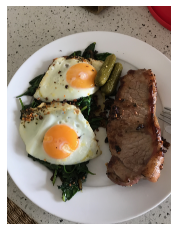

In [15]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
image = mpimg.imread("03-steak.jpeg")
plt.imshow(image)
plt.axis(False)

In [11]:
image.shape

(4032, 3024, 3)

Model expects (batch,width,height,color)

#### Change image shape

Resize 224*224

In [16]:
image = tf.io.read_file("03-steak.jpeg")
image = tf.image.decode_image(image, channels=3) # ensures 3 colour channels 
image = tf.image.resize(image, size = [224, 224])
image = image/255.
image.shape

TensorShape([224, 224, 3])

Add batch

In [17]:
image = tf.expand_dims(image, axis = 0)
image.shape

TensorShape([1, 224, 224, 3])

#### Prediction

In [16]:
model.predict(image)

array([[0.8632261]], dtype=float32)

## Multiclass CNN

### Import data

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-11-01 07:17:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.128, 173.194.192.128, 209.85.146.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   165MB/s    in 3.0s    

2021-11-01 07:17:57 (165 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [6]:
import pathlib
import numpy as np

data_dir = pathlib.Path('10_food_classes_all_data/train/')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


(-0.5, 383.5, 511.5, -0.5)

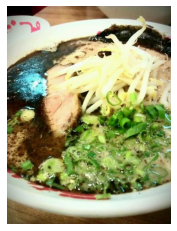

In [5]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
image = mpimg.imread("10_food_classes_all_data/train/ramen/1002305.jpg")
plt.imshow(image)
plt.axis(False)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.,
                                   horizontal_flip = True,
                                   zoom_range = 0.1,
                                   rotation_range = 0.1 
                                   )
test_datagen = ImageDataGenerator(rescale = 1/225.)

train = train_datagen.flow_from_directory("10_food_classes_all_data/train/",
                                          target_size = (224,224),
                                          batch_size = 32,
                                          class_mode = 'categorical'
                                          )
test = test_datagen.flow_from_directory("10_food_classes_all_data/test/",
                                          target_size = (224,224),
                                          batch_size = 32,
                                          class_mode = 'categorical'
                                          )

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Build model

In [12]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(10,3,activation = 'relu',input_shape = (224,224,3)))
model.add(tf.keras.layers.MaxPool2D(2))
model.add(tf.keras.layers.Conv2D(10,3,activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))

model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

history = model.fit(train,epochs = 5,
                    steps_per_epoch=0.5*len(train),
                    validation_data=test,
                    validation_steps=0.5*len(test)) # USE 0.25*len(test) for run 25% of the data

Epoch 1/5
117/117 [==============================] - 61s 514ms/step - loss: 2.1558 - accuracy: 0.2238 - val_loss: 1.9808 - val_accuracy: 0.3063
Epoch 2/5
117/117 [==============================] - 59s 505ms/step - loss: 1.9543 - accuracy: 0.3159 - val_loss: 1.9340 - val_accuracy: 0.3344
Epoch 3/5
117/117 [==============================] - 59s 506ms/step - loss: 1.8742 - accuracy: 0.3498 - val_loss: 1.8863 - val_accuracy: 0.3484
Epoch 4/5
117/117 [==============================] - 59s 502ms/step - loss: 1.8515 - accuracy: 0.3725 - val_loss: 1.8710 - val_accuracy: 0.3508
Epoch 5/5
117/117 [==============================] - 58s 494ms/step - loss: 1.7732 - accuracy: 0.4004 - val_loss: 1.9209 - val_accuracy: 0.3594


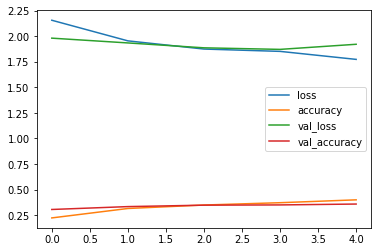

In [13]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [14]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 29160)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
________________________________________________

In [ ]:
# clone model (copy model)
model2 = tf.keras.models.clone_model(model)

### Make prediction

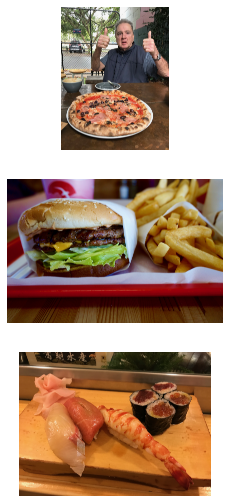

In [22]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
col = ['03-pizza-dad.jpeg','03-hamburger.jpeg','03-sushi.jpeg']
plt.figure(figsize = (4,9))
for i in range(3):
  plt.subplot(3,1,i+1)
  image = mpimg.imread(col[i])
  plt.imshow(image)
  plt.axis(False)

In [32]:
def load_photo(filename):
  image = tf.io.read_file(filename)
  image = tf.image.decode_image(image, channels=3)
  image = tf.image.resize(image, size = [224, 224])
  image = image/255.
  return image

def prediction(model, filename, class_names):

  image = load_photo(filename)
  batch_image = tf.expand_dims(image, axis = 0)
  pred = model.predict(batch_image)

  if len(pred[0]) > 1:  # multiclass
    pred_class = class_names[pred.argmax()]
  else:  # binary class
    pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(image)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

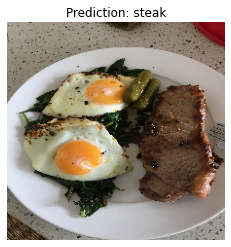

In [33]:
prediction(model = model, filename = "03-steak.jpeg",class_names=class_names)

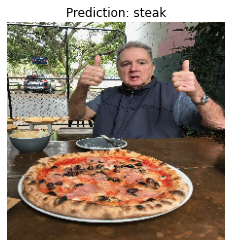

In [34]:
prediction(model = model, filename = col[0],class_names=class_names)

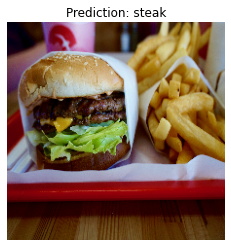

In [35]:
prediction(model = model, filename = col[1],class_names=class_names)

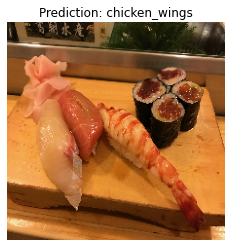

In [36]:
prediction(model = model, filename = col[2],class_names=class_names)

## Save and load model

In [ ]:
model.save("trained_model")
model = tf.keras.models.load_model("trained_model")